In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
%matplotlib inline

In [ ]:
#The dataset that has been used in model training task consists of totally 640
#samples which represent performance measurement from simulation of 2D
#Multiprocessor Optical Interconnection Network.
#Attribute Information:
# Node Number - The Number of Nodes in Network (64 or 16)
# Thread Number - The number of threads in each node at beginning of simulation
# Spatial Distribution - This column indicates performance of the network, UN (Uniform),HR (Hot Region),BR (Bit Reverse),PS (Perfect Shuffle)
# Temporal Distribution - 

df = pd.read_csv('optical_interconnection_network .csv')

df2 = df.copy()

#luckily there is no any missing value in dataset
for z in df2.columns:
  df2 = df2[df2[z].notna()]

if len(df) - len(df2) == 0:
  print('there is no any missing value in dataset')

there is no any missing value in dataset


In [ ]:
df.head()

,Node Number,Thread Number,Spatial Distribution,Temporal Distribution,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization
0,64,4,UN,Client-Server,"0,1","0,839546","1,974,686","308,491,814","700,514,102","0,352431"
1,64,4,UN,Client-Server,"0,2","0,827412","9,556,437","291,037,663","864,599,227","0,506302"
2,64,4,UN,Client-Server,"0,3","0,802605","27,027,618","264,928,002","839,372,851","0,638516"
3,64,4,UN,Client-Server,"0,4","0,723403","61,848,511","235,776,888","1,256,053,108","0,767051"
4,64,4,UN,Client-Server,"0,5","0,72121","121,085,884","189,680,044","1,343,875,577","0,807812"


In [ ]:
#Column names in dataset
df.columns

Index(['Node Number', 'Thread Number', 'Spatial Distribution',
       'Temporal Distribution', 'T/R', 'Processor Utilization ',
       'Channel Waiting Time', 'Input Waiting Time', 'Network Response Time',
       'Channel Utilization'],
      dtype='object')

In [ ]:
#before normalizing part we have to convert some categorical valued features into 
#numeric representation with label encoding
le = LabelEncoder()
label = le.fit_transform(df['Spatial Distribution'])
label2 = le.fit_transform(df['Temporal Distribution'])
df.drop("Spatial Distribution", axis = 1, inplace = True)
df["Spatial Distribution"] = label
df.drop("Temporal Distribution", axis = 1, inplace = True)
df["Temporal Distribution"] = label2
df

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Spatial Distribution,Temporal Distribution
0,64,4,"0,1","0,839546","1,974,686","308,491,814","700,514,102","0,352431",3,1
1,64,4,"0,2","0,827412","9,556,437","291,037,663","864,599,227","0,506302",3,1
2,64,4,"0,3","0,802605","27,027,618","264,928,002","839,372,851","0,638516",3,1
3,64,4,"0,4","0,723403","61,848,511","235,776,888","1,256,053,108","0,767051",3,1
4,64,4,"0,5","0,72121","121,085,884","189,680,044","1,343,875,577","0,807812",3,1
...,...,...,...,...,...,...,...,...,...,...
635,16,10,"0,6","0,79234","532,737,732","363,094,043","1,214,057,768","0,961042",2,0
636,16,10,"0,7","0,707199","75,167,511","224,638,088","1,653,736,882","0,981944",2,0
637,16,10,"0,8","0,61823","905,326,843","206,922,631","1,421,304,936","0,9625",2,0
638,16,10,"0,9","0,564482","1,048,269,897","154,713,952","2,371,043,062","0,979375",2,0


In [ ]:
#in these columns instead of ",", "." has been written for ratio numbers. for example 0,4 instead of 0.5
for x in range(len(df['T/R'])):
   df['T/R'][x] = df['T/R'][x].replace(",",".")
   
for x in range(len(df['Processor Utilization '])):
   df['Processor Utilization '][x] = df['Processor Utilization '][x].replace(",",".") 

for x in range(len(df['Channel Utilization'])):
   df['Channel Utilization'][x] = df['Channel Utilization'][x].replace(",",".")

<ipython-input-87-963424fd6e78>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T/R'][x] = df['T/R'][x].replace(",",".")
<ipython-input-87-963424fd6e78>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Processor Utilization '][x] = df['Processor Utilization '][x].replace(",",".")
<ipython-input-87-963424fd6e78>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Channel Utilization'][x] = df['Channel Utilization'][x].replace(

In [ ]:
#in these columns we just remove ',' sign to represent large numbers as integer
#for example instead of 1,111,234 we write as 11111234
for x in range(len(df['Channel Waiting Time'])):
   df['Channel Waiting Time'][x] = df['Channel Waiting Time'][x].replace(",","")

for x in range(len(df['Input Waiting Time'])):
   df['Input Waiting Time'][x] = df['Input Waiting Time'][x].replace(",","")

for x in range(len(df['Network Response Time'])):
   df['Network Response Time'][x] = df['Network Response Time'][x].replace(",","")
   

<ipython-input-88-4c14935e8d06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Channel Waiting Time'][x] = df['Channel Waiting Time'][x].replace(",","")
<ipython-input-88-4c14935e8d06>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Input Waiting Time'][x] = df['Input Waiting Time'][x].replace(",","")
<ipython-input-88-4c14935e8d06>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Network Response Time'][x] = df['Networ

In [ ]:
df.head()

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Spatial Distribution,Temporal Distribution
0,64,4,0.1,0.839546,1974686,308491814,700514102,0.352431,3,1
1,64,4,0.2,0.827412,9556437,291037663,864599227,0.506302,3,1
2,64,4,0.3,0.802605,27027618,264928002,839372851,0.638516,3,1
3,64,4,0.4,0.723403,61848511,235776888,1256053108,0.767051,3,1
4,64,4,0.5,0.72121,121085884,189680044,1343875577,0.807812,3,1


In [ ]:
#normalizing with minmax method
df2 = df.copy()
scaler = MinMaxScaler()
scaler.fit(df)
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled, columns = df.columns)

In [ ]:
for x in df.columns:
  df[x] = df[x].astype(float)
#df['Spatial Distribution'] = df2['Spatial Distribution']
df['Temporal Distribution'] = df2['Temporal Distribution']
df.head()

,Node Number,Thread Number,T/R,Processor Utilization,Channel Waiting Time,Input Waiting Time,Network Response Time,Channel Utilization,Spatial Distribution,Temporal Distribution
0,1.0,0.0,0.000000,0.812571,0.001203,0.345479,0.115393,0.252483,1.0,1
1,1.0,0.0,0.111111,0.797097,0.005862,0.325930,0.142447,0.432801,1.0,1
2,1.0,0.0,0.222222,0.765461,0.016598,0.296685,0.138287,0.587739,1.0,1
3,1.0,0.0,0.333333,0.664456,0.037996,0.264034,0.206989,0.738366,1.0,1
4,1.0,0.0,0.444444,0.661659,0.074398,0.212403,0.221469,0.786133,1.0,1


In [ ]:
#we will do outlier analysis for only 4 columns using popular box plot method
print("Old Shape: ", df.shape)

for x in df.columns: 
  if x == 'Processor Utilization ' or x == 'Channel Waiting Time' or x == 'Input Waiting Time' or x =='Network Response Time':

    Q1 = np.percentile(df[x], 25,
                   interpolation = 'midpoint')
    Q3 = np.percentile(df[x], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1

    # Upper bound
    upper = np.where(df[x] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[x] <= (Q1-1.5*IQR))
 
    ''' Removing the Outliers '''
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (640, 10)
New Shape:  (616, 10)


In [ ]:
X = df.drop(["Temporal Distribution"], axis = 1)
y = df["Temporal Distribution"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, random_state=42)

In [ ]:
y_train.unique()

array([0, 1])

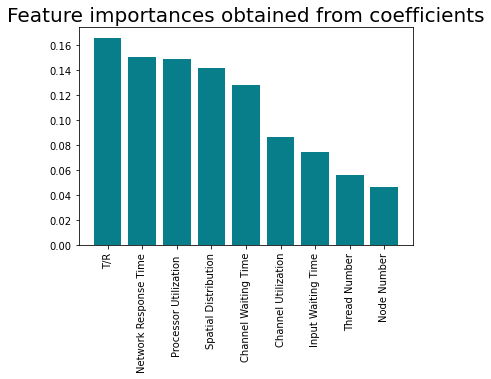

In [ ]:
#OZELLIKLERIN ONEM DERECESINE GORE SIRALANMASINI XGB MODELINI KULLANARAK 
#GOSTEREBILIRIZ
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#1st classification model type KNN with Cross Validation
parameter_range = [3,5,7,9,11,13,15]
for x in parameter_range:
  knn = KNeighborsClassifier(n_neighbors=x)
  cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
  print('neighbor number - > ', x, 'score -> ', np.mean(cv_scores))

neighbor number - >  3 score ->  0.6839177185600748
neighbor number - >  5 score ->  0.6968910705937355
neighbor number - >  7 score ->  0.7293361383824217
neighbor number - >  9 score ->  0.7359046283309958
neighbor number - >  11 score ->  0.7270920991117344
neighbor number - >  13 score ->  0.7186068256194484
neighbor number - >  15 score ->  0.6970313230481533


In [ ]:
#we choose 15 as parameter
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train, y_train)
print("parameter -> ",15,"and the score -> ",knn.score(X_test, y_test))

parameter ->  15 and the score ->  0.7727272727272727


In [ ]:
predict_train = knn.predict(X_train)
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[217  23]
 [ 69 153]]
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       240
           1       0.87      0.69      0.77       222

    accuracy                           0.80       462
   macro avg       0.81      0.80      0.80       462
weighted avg       0.81      0.80      0.80       462



In [ ]:
#Second model Naive Bayes
model2 = GaussianNB()
model2.fit(X_train, y_train)

GaussianNB()

In [ ]:
print("the score -> ",model2.score(X_test, y_test))

the score ->  0.6883116883116883


In [ ]:
predict_train = model2.predict(X_train)
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[183  57]
 [ 61 161]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       240
           1       0.74      0.73      0.73       222

    accuracy                           0.74       462
   macro avg       0.74      0.74      0.74       462
weighted avg       0.74      0.74      0.74       462



In [ ]:
#Third Model is Decision Tree
#FIRST TIME WITHOUT A MAX DEPTH PARAMETER AND GINI SELECTOR
model3GINI = DecisionTreeClassifier()
cv_scores = cross_val_score(model3, X_train, y_train, cv=5)
print('score -> ', np.mean(cv_scores))

score ->  0.7446704067321178


In [ ]:
#with entropy
model3 = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
cv_scores = cross_val_score(model3, X_train, y_train, cv=5)
print('score -> ', np.mean(cv_scores))


score ->  0.7446704067321178


In [ ]:
model3GINI = model3GINI.fit(X_train, y_train)
print("the score with criterion Entropy -> ",model3GINI.score(X_test, y_test))

the score with criterion Entropy ->  0.8246753246753247


In [ ]:
predict_train = model3GINI.predict(X_train)
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[240   0]
 [  0 222]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       240
           1       1.00      1.00      1.00       222

    accuracy                           1.00       462
   macro avg       1.00      1.00      1.00       462
weighted avg       1.00      1.00      1.00       462



In [ ]:
#NEURAL NETWORK
model4 = MLPClassifier(hidden_layer_sizes=(8,8), activation='relu', solver='adam', max_iter=500)
cv_scores = cross_val_score(model4, X_train, y_train, cv=5)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

In [ ]:
print('score -> ', np.mean(cv_scores))

score ->  0.9241234221598879


In [ ]:
model4 = model4.fit(X_train, y_train)
print("score -> ",model4.score(X_test, y_test))

score ->  0.8896103896103896


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
predict_train = model4.predict(X_train)
print(confusion_matrix(y_train, predict_train))
print(classification_report(y_train, predict_train))

[[229  11]
 [ 19 203]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       240
           1       0.95      0.91      0.93       222

    accuracy                           0.94       462
   macro avg       0.94      0.93      0.93       462
weighted avg       0.94      0.94      0.94       462



In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0).fit_predict(X)

#print(kmeans[:1000])

y2 = y.to_numpy()
cnt = 0


#DEGERLENDIRME
for x in range(len(kmeans)):
  if kmeans[x] == y2[x]:
    cnt = cnt + 1


print('the score is -> ', cnt / len(kmeans))

#print(y2[:1000])

print(classification_report(y2, kmeans))

#print(kmeans.score(X_test, y_test))
# y_pred = kmeans.predict(X_test)
#print('score -> ', score)

0.49188311688311687
              precision    recall  f1-score   support

           0       0.51      0.50      0.51       320
           1       0.47      0.48      0.48       296

    accuracy                           0.49       616
   macro avg       0.49      0.49      0.49       616
weighted avg       0.49      0.49      0.49       616



In [ ]:
#GAUSSIAN MIXTURE MODEL

gaussianmix = GaussianMixture(n_components = 2)
gaussian_result = gaussianmix.fit_predict(X)
gaussian_clusters = gaussian_result.unique


#DEGERLENDIRME
for x in range(len(kmeans)):
  if kmeans[x] == y2[x]:
    cnt = cnt + 1


print('the score is -> ', cnt / len(kmeans))



In [ ]:
from matplotlib import pyplot
from numpy import where
birch_model = Birch(threshold = 0.03, n_clusters = 2)

birch_result = birch_model.fit_predict(X)

# get all of the unique clusters
birch_clusters = unique(birch_result)

# plot the BIRCH clusters
for birch_cluster in birch_clusters:
    # get data points that fall in this cluster
    index = where(birch_result == birch_clusters)
    # make the plot
    pyplot.scatter(training_data[index, 0], training_data[index, 1])

# show the BIRCH plot
pyplot.show()


#DEGERLENDIRME
for x in range(len(kmeans)):
  if kmeans[x] == y2[x]:
    cnt = cnt + 1


print('the score is -> ', cnt / len(kmeans))

In [ ]:
#agglomerative hierarchy clustering algorithm
from sklearn.cluster import AgglomerativeClustering

agglomerative_model = AgglomerativeClustering(n_clusters=2)
agglomerative_result = agglomerative_model.fit_predict(X)
agglomerative_clusters = agglomerative_result.unique



#DEGERLENDIRME
for x in range(len(kmeans)):
  if kmeans[x] == y2[x]:
    cnt = cnt + 1


print('the score is -> ', cnt / len(kmeans))
